In [1]:
import numpy as np
import time
import cv2
import os

In [2]:
!wget https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names

--2021-01-29 14:02:35--  https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/h5piyms4hj3h9sz/coco.names [following]
--2021-01-29 14:02:36--  https://www.dropbox.com/s/raw/h5piyms4hj3h9sz/coco.names
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15fe2bf84b83f74a52b7b6f056.dl.dropboxusercontent.com/cd/0/inline/BH43yuwspnFhZSfwxoTIslGs1OnC_g25lYypkEqgjw8VFMeyFvRdjp_vOAzgGDSXb59XRcCUIcFX0Oj8dQI9oQbasl_WbzgeJEvcfU-OFkolRRuEGemMcq7ZMS94N2EVG-4/file# [following]
--2021-01-29 14:02:36--  https://uc15fe2bf84b83f74a52b7b6f056.dl.dropboxusercontent.com/cd/0/inline/BH43yuwspnFhZSfwxoTIslGs1OnC_g25lYypkEqgjw8VFMeyFvRdjp_vOAzgGDSXb59XRcCUIcFX0Oj8dQI9oQbasl_WbzgeJEvcfU-OFkolRRuEGemMc

In [3]:
labelsPath = r'coco.names'
LABELS = open(labelsPath).read().strip().split("\n")

In [4]:
LABELS

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [5]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

In [6]:
!wget https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights

--2021-01-29 14:02:53--  https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xhi3lh1rvy7celd/yolov3.weights [following]
--2021-01-29 14:02:53--  https://www.dropbox.com/s/raw/xhi3lh1rvy7celd/yolov3.weights
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc942cc61f7f6c3e07d57fb520ae.dl.dropboxusercontent.com/cd/0/inline/BH59WAvpGvs2SzY2hrQIhFOEAjRp77jJVxuea4cWxImtlGOproEv8AEbQ9gIQw6gUTv_hJqgOoVnzdH0ncqZ0qymUOQKId7nBlJhEofBt3_OeIiLkQibbo3UrPtZ7CCOay8/file# [following]
--2021-01-29 14:02:54--  https://uc942cc61f7f6c3e07d57fb520ae.dl.dropboxusercontent.com/cd/0/inline/BH59WAvpGvs2SzY2hrQIhFOEAjRp77jJVxuea4cWxImtlGOproEv8AEbQ9gIQw6gUTv_hJqgOoVnzdH0ncqZ0qymUOQKId7nBlJhEofBt

In [7]:
!wget https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg

--2021-01-29 14:03:01--  https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lb84ueim858rn6v/yolov3.cfg [following]
--2021-01-29 14:03:02--  https://www.dropbox.com/s/raw/lb84ueim858rn6v/yolov3.cfg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb640ac2fa7aa7498724b1be2d0.dl.dropboxusercontent.com/cd/0/inline/BH4V1xGB5au1v982UUoVHlH9p6uMD2iEWqLcy6tu7GvBFWtKoQ1pqCzcC1g7idhPWXl7k7KxertHWkfxcY94jTa5xeh_5ZKyA0vrqQyXmjSSHBNQqYNrAhvn73kBEpbN9WM/file# [following]
--2021-01-29 14:03:02--  https://ucb640ac2fa7aa7498724b1be2d0.dl.dropboxusercontent.com/cd/0/inline/BH4V1xGB5au1v982UUoVHlH9p6uMD2iEWqLcy6tu7GvBFWtKoQ1pqCzcC1g7idhPWXl7k7KxertHWkfxcY94jTa5xeh_5ZKyA0vrqQyXmjSSHBNQqYNrA

In [8]:
weightsPath = 'yolov3.weights'
configPath = 'yolov3.cfg'

In [9]:
yolo = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [10]:
!wget https://miro.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg -O sample.jpg

--2021-01-29 14:03:13--  https://miro.medium.com/max/872/1*EYFejGUjvjPcc4PZTwoufw.jpeg
Resolving miro.medium.com (miro.medium.com)... 104.17.225.63, 104.17.31.52, 2606:4700::6811:1f34, ...
Connecting to miro.medium.com (miro.medium.com)|104.17.225.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>] 156.75K  --.-KB/s    in 0.003s  

2021-01-29 14:03:13 (56.0 MB/s) - ‘sample.jpg’ saved [160514/160514]



In [11]:
image = cv2.imread('sample.jpg')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

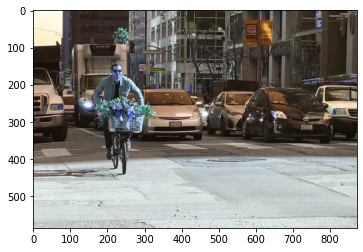

In [13]:
plt.imshow(image)
plt.show()

In [14]:
(H, W) = image.shape[:2]

In [15]:
H,W

(586, 872)

In [16]:
ln = yolo.getLayerNames()
ln = [ln[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]

In [17]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	swapRB=True, crop=False)
yolo.setInput(blob)
layerOutputs = yolo.forward(ln)


In [18]:
boxes = []
confidences = []
classIDs = []

In [19]:
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > 0.5:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

In [20]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.3)

In [21]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

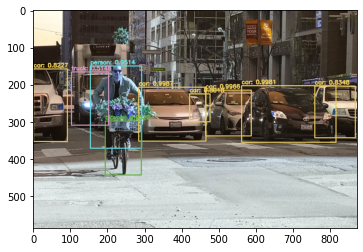

In [22]:
plt.imshow(image)
plt.show()

In [23]:
cv2.imwrite('yolo_result.jpg', image)

True